# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación
*sklearn: Para hacer la separación de la data en train y test, y para los modelos de ML y las métricas de evaluación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px
from sklearn.feature_selection import SelectKBest,f_classif
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#Importar GridSearch 
from sklearn.model_selection import GridSearchCV

# 3.Cargar la Data

Se carga el archivo de salida del notebook 14-Preprocesamiento_Data_Elegida.ipynb

In [ ]:
data = pd.read_csv("15-DF_Final_60cols.csv",index_col=0) # Read data
data_original=data.copy()
data.head(5)

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,1,0,0.0,406597.5,26.0,21.0,2,0.262949,1,1,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,0,0,0.0,1293502.5,46.0,40.0,1,0.622246,0,0,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,0,1,0.0,135000.0,52.0,8.0,2,0.555912,0,0,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,0,0,0.0,312682.5,52.0,101.0,2,0.650442,0,0,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,0,0,0.0,513000.0,55.0,101.0,2,0.322738,0,0,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


##### Revisa Carga de la Data

In [ ]:
Category=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']

Float=['CNT_CHILDREN','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']


for i in Category: 
  data[i]=data[i].astype('category')

for i in Float: 
  data[i]=data[i].astype('float64')

In [ ]:
Cuantitativas=Float
Cualitativas=Category

In [ ]:
data.shape

(295221, 60)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TARGET                                             295221 non-null  category
 1   FLAG_OWN_CAR                                       295221 non-null  category
 2   CNT_CHILDREN                                       295221 non-null  float64 
 3   AMT_CREDIT_x                                       295221 non-null  float64 
 4   DAYS_BIRTH                                         295221 non-null  float64 
 5   MONTHS_EMPLOYED                                    295221 non-null  float64 
 6   REGION_RATING_CLIENT_W_CITY                        295221 non-null  category
 7   EXT_SOURCE_2                                       295221 non-null  float64 
 8   DEF_30_CNT_SOCIAL_CIRCLE                           295221 non-nu

In [ ]:
data.isnull().sum().sum()

0

Utilización Select KBest 15 variables

In [ ]:
X=data.drop("TARGET", axis=1)
Y=data["TARGET"]

selector=SelectKBest(score_func=f_classif,k=15)
X_nuevo=selector.fit_transform(X,Y)

cols=selector.get_support(indices=True)
X.iloc[:,cols].columns

Index(['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',
       'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',
       'indice_falta_pagar'],
      dtype='object')

# 4.Partición de la data en train y test

Teniendo en cuenta que nos estamos enfrentando a un problema de data desbalanceada, se realiza la partición garantizando un muestreo estratificado para la variable TARGET

In [ ]:
#Para data utilizando K-Best
X = data[['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',\
        'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',\
        'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',\
        'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',\
        'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',\
        'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',\
        'indice_falta_pagar']].copy()
y= data["TARGET"]

In [ ]:
X.shape, y.shape

((295221, 15), (295221,))

## Split dataset 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =42, stratify=y)

In [ ]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f"Porcentaje de muestras positivas en el dataset de test={round(perc_test,4)} , y de test={round(perc_train,4)}")

Porcentaje de muestras positivas en el dataset de test=8.0752 , y de test=8.0753


# 5.Selección de la métrica de desempeño del modelo

# 6.Selección de Modelos

Selección de la métrica de evaluación: 


En el reto de kaggle piden que la métrica de evaluación sea el área ROC.

## 6.1. Modelar

Para esta iteración se modelará el problema con un modelo de regresión logística, un arbol de decisión, un naive bayes y un random forest.

### 6.1.1 Regresión Logistica

In [ ]:
#The solver “liblinear” uses a coordinate descent (CD) algorithm
rl=LogisticRegression(solver='liblinear')
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### 6.1.2 Árbol de Decisión

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 6.1.3 Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### 6.1.4 Support Vector Machine

In [ ]:
svc = SVC(C=1.0, kernel='rbf', max_iter=2000, tol=1e-3,probability=True)
svc.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=2000, probability=True)

### 6.1.5 Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 6.1.5 Predicción del Modelo

In [ ]:
#Regresion
y_dtc_pred=dtc.predict(X_test)
y_rl_pred=rl.predict(X_test)
y_gnb_pred=gnb.predict(X_test)
y_svc_pred=svc.predict(X_test)
y_rfc_pred=rfc.predict(X_test)

In [ ]:
### 2.1.4. Evaluación de los Modelos
print('Accuracy')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Score_entrenamiento:{round(dtc.score(X_train, y_train),4)},    & Score_validacion:{round(accuracy_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Score_entrenamiento:{round(rl.score(X_train, y_train),4)}, & Score_validacion:{round(accuracy_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Score_entrenamiento:{round(gnb.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_gnb_pred),4)}")
print(f"Support Vector Machines  : Score_entrenamiento:{round(svc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Score_entrenamiento:{round(rfc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_rfc_pred),4)}\n")

print('Recall')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Recall_validacion:{1-round(recall_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Recall_validacion:{1-round(recall_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Recall_validacion:{1-round(recall_score(y_test,y_gnb_pred),4)}")
print(f"Support Vector Machines  : Recall_validacion:{1-round(recall_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Recall_validacion:{1-round(recall_score(y_test,y_rfc_pred),4)}")


Accuracy
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Score_entrenamiento:1.0,    & Score_validacion:0.8538
Logistic Regresion       : Score_entrenamiento:0.9193, & Score_validacion:0.9192
Naive Bayes              : Score_entrenamiento:0.8815,  & Score_validacion:0.8811
Support Vector Machines  : Score_entrenamiento:0.2981,  & Score_validacion:0.2996
Random Forest            : Score_entrenamiento:0.9848,  & Score_validacion:0.917

Recall
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Recall_validacion:0.8505
Logistic Regresion       : Recall_validacion:0.9965
Naive Bayes              : Recall_validacion:0.8384
Support Vector Machines  : Recall_validacion:0.16210000000000002
Random Forest            : Recall_validacion:0.9857


In [ ]:
from sklearn.metrics import classification_report

#Classification Report para los modelos 
print(f"Logistic Regresion  Results:\n" 
      f"{classification_report(y_test,y_rl_pred)}\n")

print(f"Naive Bayes Results:\n" 
      f"{classification_report(y_test,y_gnb_pred)}\n")

print(f"Decision tree Results:\n" 
      f"{classification_report(y_test,y_dtc_pred)}\n")

print(f"Support Vector Machines:\n" 
      f"{classification_report(y_test,y_svc_pred)}\n")

print(f"Random Forest:\n" 
      f"{classification_report(y_test,y_rfc_pred)}\n")

Logistic Regresion  Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81415
           1       0.47      0.00      0.01      7152

    accuracy                           0.92     88567
   macro avg       0.70      0.50      0.48     88567
weighted avg       0.88      0.92      0.88     88567


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     81415
           1       0.20      0.16      0.18      7152

    accuracy                           0.88     88567
   macro avg       0.57      0.55      0.56     88567
weighted avg       0.87      0.88      0.87     88567


Decision tree Results:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     81415
           1       0.13      0.15      0.14      7152

    accuracy                           0.85     88567
   macro avg       0.53      0.53      0.53     88567

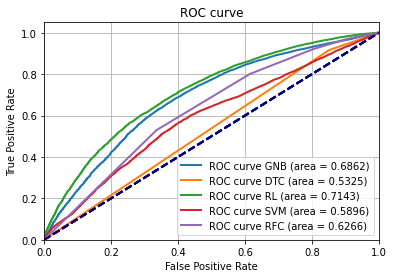

In [ ]:
labels=['Naive Bayes','Decision tree','Logistic Regresion',\
        'Support Vector Machines',
        'Random Forest']
fpr =[]
tpr = []
mod=''

#Complete el código
for i in range(len(labels)):
  fpr.append(0)
  tpr.append(0)
  if i==0:
    y_pred2 = gnb.predict_proba(X_test)
    mod='GNB'
  elif i==1:
    y_pred2 = dtc.predict_proba(X_test)
    mod='DTC'
  elif i==2:
    y_pred2 = rl.predict_proba(X_test)
    mod='RL'
  elif i==3:
    y_pred2 = svc.predict_proba(X_test)
    #y_pred2 = svc.decision_function(X_test)
    mod='SVM'
  else:
    y_pred2 = rfc.predict_proba(X_test)
    mod='RFC'
  score = y_pred2[:,0]-y_pred2[:,1]
  fpr[i], tpr[i],_ = roc_curve(y_test,score)
  roc_auc = 1 - auc(fpr[i], tpr[i])
  plt.plot(tpr[i],fpr[i],lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.grid()
plt.show()

## 6.2.Hyperparameter tunning

De acuerdo a la métrica ROC del modelo, se procede realizar optimización de hiperparametros solo para aquellos cuya área supere el 0.60, es decir: 


1.   Logistic Regresion
2.   Naive Bayes              
3.   Random Forest



In [ ]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score_Validation : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", 1-recall)
    print()

### 6.2.1 Regresión Logística

In [ ]:
parameters = {'penalty': ['l1', 'l2'], 
              'C': [0.1, 0.4, 0.8, 1, 2, 5]}

grid_search_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5, \
                              return_train_score=True,  scoring='roc_auc')
grid_search_LR.fit(X_train,y_train)

grid_search_LR.best_params_

{'C': 0.4, 'penalty': 'l1'}

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', grid_search_LR.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search_LR.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search_LR.cv_results_['rank_test_score'][i])

Parameters:  {'C': 0.1, 'penalty': 'l1'}
Mean Test Score:  0.7131653078197564
Rank:  11
Parameters:  {'C': 0.1, 'penalty': 'l2'}
Mean Test Score:  0.7121851306036583
Rank:  12
Parameters:  {'C': 0.4, 'penalty': 'l1'}
Mean Test Score:  0.7134161978417903
Rank:  1
Parameters:  {'C': 0.4, 'penalty': 'l2'}
Mean Test Score:  0.7132115089452229
Rank:  10
Parameters:  {'C': 0.8, 'penalty': 'l1'}
Mean Test Score:  0.7132990685203279
Rank:  8
Parameters:  {'C': 0.8, 'penalty': 'l2'}
Mean Test Score:  0.7132462982391031
Rank:  9
Parameters:  {'C': 1, 'penalty': 'l1'}
Mean Test Score:  0.7133384461442215
Rank:  5
Parameters:  {'C': 1, 'penalty': 'l2'}
Mean Test Score:  0.7133812111943124
Rank:  3
Parameters:  {'C': 2, 'penalty': 'l1'}
Mean Test Score:  0.7133378525848977
Rank:  6
Parameters:  {'C': 2, 'penalty': 'l2'}
Mean Test Score:  0.7133658005523156
Rank:  4
Parameters:  {'C': 5, 'penalty': 'l1'}
Mean Test Score:  0.7133067194285803
Rank:  7
Parameters:  {'C': 5, 'penalty': 'l2'}
Mean Test S

Nota: La optimización para la Regresión Logística como meta de scoring='accurancy', los best_params_ resultantes eran de: {'C': 0.1, 'penalty': 'l2'}. Para el scoring='roc_auc', los best_params_ son {'C': 0.4, 'penalty': 'l1'}

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', \
    penalty='l1', C=0.4). \
    fit(X_train, y_train)

In [ ]:
y_pred_LR = logistic_model.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_LR)

Test data count:  88567
accuracy_count :  81412
accuracy_score_Validation :  0.9192137026206149
precision_score :  0.47058823529411764
recall_score :  0.9966442953020134



In [ ]:
print(f"accuracy_score_Training: {logistic_model.score(X_train, y_train)}")

accuracy_score_Training: 0.919299892574061


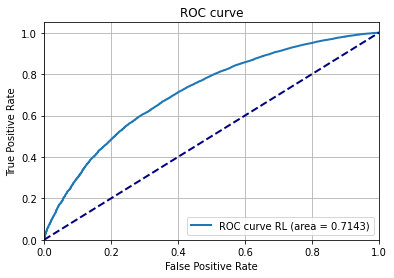

In [ ]:
y_pred2 = logistic_model.predict_proba(X_test)
mod='RL'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.7142512302670564


### 6.2.2 Árbol de Decisión

En las diferentes iteraciones el modelo ha tenido un desempeño muy pobre, por lo cual se descarta la optimización de hiperparametros para este modelo

### 6.2.3 Naive Bayes

Esta técnica no tiene hiperparametro por optimizar

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_pred_GNB = gnb.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_GNB)

Test data count:  88567
accuracy_count :  78036
accuracy_score_Validation :  0.8810956676866102
precision_score :  0.20312774556316993
recall_score :  0.8383668903803132



In [ ]:
print(f"accuracy_score_Training: {gnb.score(X_train, y_train)}")

accuracy_score_Training: 0.8815169316829096


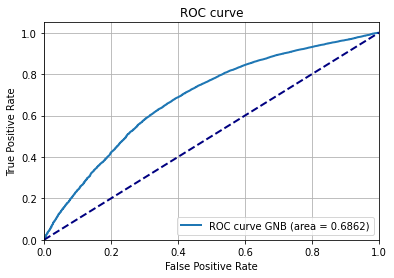

In [ ]:
y_pred2 = gnb.predict_proba(X_test)
mod='GNB'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.686186710182495


### 6.2.4 Support Vector Machine

In [ ]:
parameters = {'kernel': ['linear', 'rbf', 'poly'], 
           'C': [0.1, 1.0, 10.0, 100.0, 1000.0], 
            'gamma': [0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(SVC(max_iter=2000, tol=1e-3), parameters, cv=5, scoring='roc_auc',
                            return_train_score=True, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

grid_search_svm.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
grid_search_svm.best_score_

0.5613490471047602

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', grid_search_svm.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search_svm.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search_svm.cv_results_['rank_test_score'][i])

Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean Test Score:  0.5613490471047602
Rank:  1
Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score:  0.5083264298501403
Rank:  16
Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean Test Score:  0.48791530200981725
Rank:  42
Parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mean Test Score:  0.5613490471047602
Rank:  1
Parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score:  0.5035101081551974
Rank:  31
Parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Mean Test Score:  0.5559494399460757
Rank:  7
Parameters:  {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}
Mean Test Score:  0.5613490471047602
Rank:  1
Parameters:  {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Mean Test Score:  0.507387780533794
Rank:  22
Parameters:  {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Mean Test Score:  0.460934291006361
Rank:  54
Parameters:  {'C': 0.1, 'gamma': 100, 'kernel': 'linear'}
Mean Test Score:  0.561349

In [ ]:
svc = SVC(C=0.1, kernel='linear', max_iter=2000, tol=1e-3,gamma=0.1,probability=True)
svc.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=0.1, gamma=0.1, kernel='linear', max_iter=2000, probability=True)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_svc)

Test data count:  88567
accuracy_count :  63022
accuracy_score_Validation :  0.7115742883918389
precision_score :  0.05376291911300888
recall_score :  0.8450782997762863



In [ ]:
print(f"accuracy_score_Training: {svc.score(X_train, y_train)}")

accuracy_score_Training: 0.712819495388427


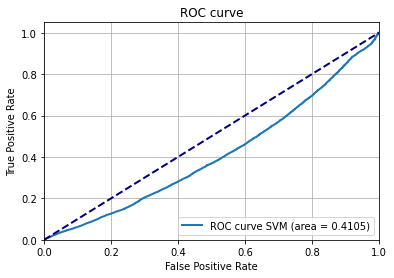

In [ ]:
y_pred2 = svc.predict_proba(X_test)
mod='SVM'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.41050957728109116


### 6.2.5 Random Forest

#### Búsqueda basada en validación cruzada

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_search_rfc.fit(X_train, y_train)

grid_search_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', grid_search_rfc.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search_rfc.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search_rfc.cv_results_['rank_test_score'][i])

Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
Mean Test Score:  0.9192466635678678
Rank:  1
Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Mean Test Score:  0.9192466635678678
Rank:  1
Parame

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth=4, max_features='auto') 
rfc.fit(X_train,y_train) 

RandomForestClassifier(max_depth=4, n_estimators=200)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_rfc)

Test data count:  88567
accuracy_count :  81415
accuracy_score_Validation :  0.9192475752819899
precision_score :  0.0
recall_score :  1.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"accuracy_score_Training: {rfc.score(X_train, y_train)}")

accuracy_score_Training: 0.9192466635051826


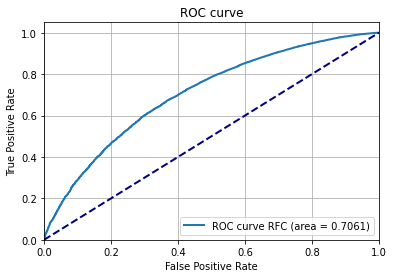

In [ ]:
y_pred2 = rfc.predict_proba(X_test)
mod='RFC'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# import numpy as np
# from sklearn.metrics import roc_auc_score
# from sklearn import metrics

# print(roc_auc_score(y_test, y_pred_LR))
# fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_LR,pos_label=1)
# print(metrics.auc(fpr,tpr))
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.7061452952331806


#### Búsqueda basada en métrica out-of-bag

In [ ]:
import pandas as pd
import numpy as np
import typing
from typing import Optional, Union, Tuple
import logging
import tqdm

from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import  mean_absolute_error, mean_squared_error


logging.basicConfig(
    format = '%(asctime)-5s %(name)-10s %(levelname)-5s %(message)s', 
    level  = logging.INFO,
)


def check_early_stopping(
    scores: Union[list, np.ndarray],
    metric: str,
    stopping_rounds: int=4,
    stopping_tolerance: float=0.01,
    max_runtime_sec: int=None,
    start_time: pd.Timestamp=None) -> bool:
    
    """
    Check if early stopping condition is met.
    
    Parameters
    ----------
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric which scores referes to. Used to determine if higher score
        means a better model or the opposite.
        
    stopping_rounds: int, default 4
        Number of consecutive rounds without improvement needed to stop
        the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement.
    
    max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
    
    start_time: pd.Timestamp, default `None`
        Time when training started. Used to determine if `max_runtime_sec` has been
        reached.
        
        
    Returns
    ------
    bool:
        `True` if any condition needed for early stopping is met. `False` otherwise.
        
    Notes
    -----
    
    Example of early stopping:
        
    Stop after 4 rounds without an improvement of 1% or higher: `stopping_rounds` = 4,
    `stopping_tolerance` = 0.01, `max_runtime_sec` = None.
    
    """
    
    allowed_metrics = ['accuracy', 'auc', 'f1', 'mse', 'mae', 'squared_error',
                       'absolute_error']
    
    if metric not in allowed_metrics:
        raise Exception(
                f"`metric` argument must be one of: {allowed_metrics}. "
                f"Got {metric}"
        )
    
    if isinstance(scores, list):
        scores = np.array(scores)
        
    if max_runtime_sec is not None:
        
        if start_time is None:
            start_time = pd.Timestamp.now()
            
        runing_time = (pd.Timestamp.now() - start_time).total_seconds()
        
        if runing_time > max_runtime_sec:
            logging.debug(
                f"Reached maximum time for training ({max_runtime_sec} seconds). "
                f"Early stopping activated."
            )
            return True
        
    if len(scores) < stopping_rounds:
        return False
    
    if metric in ['accuracy', 'auc', 'f1']:
        # The higher the metric, the better
        diff_scores = scores[1:] - scores[:-1]
        improvement = diff_scores / scores[:-1]
        
    if metric in ['mse', 'mae', 'squared_error', 'absolute_error']:
        # The lower the metric, the better
        
        # scores = -1 * scores 
        # diff_scores = scores[:-1] - scores[1:]
        # improvement = diff_scores / scores[1:]
        diff_scores = scores[1:] - scores[:-1]
        improvement = diff_scores / scores[:-1]
        improvement = -1 * improvement
        
    improvement = np.hstack((np.nan, improvement))
    logging.debug(f"Improvement: {improvement}")
    
    if (improvement[-stopping_rounds:] < stopping_tolerance).all():
        return True
    else:
        return False


    
def fit_RandomForest_early_stopping(
    model: Union[RandomForestClassifier, RandomForestRegressor],
    X: Union[np.ndarray, pd.core.frame.DataFrame],
    y: np.ndarray,
    metric: str,
    positive_class: int=1,
    score_tree_interval: int=None,
    stopping_rounds: int=4,
    stopping_tolerance: float=0.01,
    max_runtime_sec: int=None) -> np.ndarray:
    
    """
    Fit a RandomForest model until an early stopping condition is met or
    `n_estimatos` is reached.
    
    Parameters
    ----------
    
    model: RandomForestClassifier, RandomForestRegressor
        Model to be fitted.
        
    X: np.ndarray, pd.core.frame.DataFrame
        Training input samples. 
    
    y: np.ndarray, pd.core.frame.DataFrame
        Target value of the input samples. 
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric used to generate the score. Used to determine if higher score
        means a better model or the opposite.
        
    score_tree_interval: int, default `None`
        Score the model after this many trees. If `None`, the model is scored after
        `n_estimators` / 10.
        
    stopping_rounds: int
        Number of consecutive rounds without improvement needed to stop the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement. 
    
    max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
        
        
    Returns
    ------
    oob_scores: np.ndarray
        Out of bag score for each scoring point.
    
    """
    
    if score_tree_interval is None:
        score_tree_interval = int(model.n_estimators / 10)
        
    allowed_metrics = ['accuracy', 'auc', 'f1', 'mse', 'mae', 'squared_error',
                       'absolute_error']
    
    if metric not in allowed_metrics:
        raise Exception(
                f"`metric` argument must be one of: {allowed_metrics}. "
                f"Got {metric}"
        )
    
    if not model.oob_score:
        model.set_params(oob_score=True)
        
    start_time = pd.Timestamp.now()
    oob_scores = []
    scoring_points = np.arange(0, model.n_estimators + 1, score_tree_interval)[1:]
    scoring_points = np.hstack((1, scoring_points))
    
    metrics = {
        'auc' : roc_auc_score,
        'accuracy' : accuracy_score,
        'f1': f1_score,
        'mse': mean_squared_error,
        'squared_error': mean_squared_error,
        'mae': mean_absolute_error,
        'absolute_error': mean_absolute_error,        
    }
    
    for i, n_estimators in enumerate(scoring_points):
        
        logging.debug(f"Training with n_stimators: {n_estimators}")
        model.set_params(n_estimators=n_estimators)
        model.fit(X=X, y=y)
        
        if metric == 'auc':
            oob_predictions = model.oob_decision_function_[:, positive_class]
            # If n_estimators is small it might be possible that a data point
            # was never left out during the bootstrap. In this case,
            # oob_decision_function_ might contain NaN.
            oob_score = metrics[metric](
                            y_true=y[~np.isnan(oob_predictions)],
                            y_score=oob_predictions[~np.isnan(oob_predictions)]
                        )
        else:
            oob_predictions = model.oob_decision_function_
            oob_predictions = np.argmax(oob_predictions, axis=1)
            oob_score = metrics[metric](
                            y_true=y[~np.isnan(oob_predictions)],
                            y_score=oob_predictions[~np.isnan(oob_predictions)]
                        )
            
        oob_scores.append(oob_score)
        
        early_stopping = check_early_stopping(
                            scores             = oob_scores,
                            metric             = metric,
                            stopping_rounds    = stopping_rounds,
                            stopping_tolerance = stopping_tolerance,
                            max_runtime_sec    = max_runtime_sec,
                            start_time         = start_time
                         )    
        
        if early_stopping:
            logging.debug(
                f"Early stopping activated at round {i + 1}: n_estimators = {n_estimators}"
            )
            break
        
    logging.debug(f"Out of bag score = {oob_scores[-1]}")
    
    return np.array(oob_scores), scoring_points[:len(oob_scores)]
    

def custom_gridsearch_RandomForestClassifier(
    model: RandomForestClassifier,
    X: Union[np.ndarray, pd.core.frame.DataFrame],
    y: np.ndarray,
    metric: str,
    param_grid: dict,
    positive_class: int=1,
    score_tree_interval: int=None,
    stopping_rounds: int=5,
    stopping_tolerance: float=0.01,
    model_max_runtime_sec: int=None,
    max_models: int=None,
    max_runtime_sec: int=None,
    return_best: bool=True) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    '''
    Grid search for RandomForestClassifier model based on out-of-bag metric and 
    early stopping for each model fit.
    
    Parameters
    ----------
    
    model: RandomForestClassifier
        Model to search over.
           
    X: np.ndarray, pd.core.frame.DataFrame
        The training input samples. 
    
    y: np.ndarray, pd.core.frame.DataFrame
        The target of input samples. 
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric used to generate the score. I is used to determine if higher score
        means a better model or the opposite.
        
    score_tree_interval: int, default `None`
        Score the model after this many trees. If `None`, the model is scored after
        `n_estimators` / 10.
        
    stopping_rounds: int
        Number of consecutive rounds without improvement needed to stop the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement. 
    
    model_max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
        
    max_models: int, default `None`
        Maximum number of models trained during the search.
    
    max_runtime_sec: int, default `None`
        Maximum number of seconds for the search.
        
    return_best : bool
        Refit model using the best found parameters on the whole data.
        
        
    Returns
    ------
    
    results: pd.DataFrame
    
    '''
    
    results = {'params': [], 'oob_metric': []}
    start_time = pd.Timestamp.now()
    history_scores = {}
    history_scoring_points = np.array([], dtype = int)
    param_grid = list(ParameterGrid(param_grid))
    
    if not model.oob_score:
        model.set_params(oob_score=True)
    
    if max_models is not None and max_models < len(param_grid):
        param_grid = np.random.choice(param_grid, max_models)

    for params in tqdm.tqdm(param_grid):
        
        if max_runtime_sec is not None:
            runing_time = (pd.Timestamp.now() - start_time).total_seconds()
            if runing_time > max_runtime_sec:
                logging.info(
                    f"Reached maximum time for GridSearch ({max_runtime_sec} seconds). "
                    f"Search stopped."
                )
                break   
        
        model.set_params(**params)

        oob_scores, scoring_points = fit_RandomForest_early_stopping(
                                        model = clone(model), # Clone to avoid modification of n_estimators
                                        X = X,
                                        y = y,
                                        metric = metric,
                                        positive_class      = positive_class,
                                        score_tree_interval = score_tree_interval,
                                        stopping_rounds     = stopping_rounds,
                                        stopping_tolerance  = stopping_tolerance,
                                        max_runtime_sec     = model_max_runtime_sec
                                     )
      
        history_scoring_points = np.union1d(history_scoring_points,  scoring_points)        
        history_scores[str(params)] = oob_scores
        params['n_estimators'] = scoring_points[-1]
        results['params'].append(params)
        results['oob_metric'].append(oob_scores[-1])
        logging.debug(f"Modelo: {params} \u2713")

    results = pd.DataFrame(results)
    history_scores = pd.DataFrame(
                            dict([(k, pd.Series(v)) for k,v in history_scores.items()])
                         )
    history_scores['n_estimators'] = history_scoring_points
    
    if metric in ['accuracy', 'auc', 'f1']:
        results = results.sort_values('oob_metric', ascending=False)
    else:
        results = results.sort_values('oob_metric', ascending=True)
        
    results = results.rename(columns = {'oob_metric': f'oob_{metric}'})
    
    if return_best:
        best_params = results['params'].iloc[0]
        print(
            f"Refitting mode using the best found parameters and the whole data set: \n {best_params}"
        )
        
        model.set_params(**best_params)
        model.fit(X=X, y=y)
        
    results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
    results = results.drop(columns = 'params')
    
    return results, history_scores

In [ ]:
# Grid de valores sobre los que buscar
param_grid = {
             'max_depth'   : [4,5,6,7,8],
             'min_samples_leaf': [0.05, 0.1],
             'max_features': ['sqrt', 'log2','auto'],
             'criterion' :['gini', 'entropy'],
             'ccp_alpha': [0, 0.01]
            }
# Modelo
model = RandomForestClassifier(
            n_estimators = 1000,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
        )

# # Búsqueda de mejor modelo basada en métrica out-of-bag
# start = pd.Timestamp.now()

resultados, history = custom_gridsearch_RandomForestClassifier(
                        model                 = model,
                        X                     = X,
                        y                     = y,
                        metric                = 'auc',
                        param_grid            = param_grid,
                        positive_class        = 1,
                        score_tree_interval   = 50,
                        stopping_rounds       = 4,
                        stopping_tolerance    = 0.01,
                        model_max_runtime_sec = None,
                        max_models            = None,
                        max_runtime_sec       = None,
                        return_best           = True
                      )

# end = pd.Timestamp.now()
# print(f"Duración búsqueda: {end-start}")

# https://www.cienciadedatos.net/documentos/py36-grid-search-random-forest-out-of-bag-error-early-stopping.html

  0%|          | 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  1%|          | 1/120 [01:41<3:22:06, 101.90s/it]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  2%|▏         | 2/120 [03:03<2:56:43, 89.86s/it] /usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  2%|▎         | 3/120 [04:42<3:03:27, 94.08s/it]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees 

Refitting mode using the best found parameters and the whole data set: 
 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.05, 'n_estimators': 250}


In [ ]:
resultados

,oob_auc,ccp_alpha,criterion,max_depth,max_features,min_samples_leaf,n_estimators
10,0.698367,0.00,gini,5,auto,0.05,250
8,0.698367,0.00,gini,5,log2,0.05,250
6,0.698367,0.00,gini,5,sqrt,0.05,250
22,0.698345,0.00,gini,7,auto,0.05,250
18,0.698345,0.00,gini,7,sqrt,0.05,250
...,...,...,...,...,...,...,...
84,0.479603,0.01,gini,8,sqrt,0.05,200
85,0.479603,0.01,gini,8,sqrt,0.10,200
86,0.479603,0.01,gini,8,log2,0.05,200
87,0.479603,0.01,gini,8,log2,0.10,200


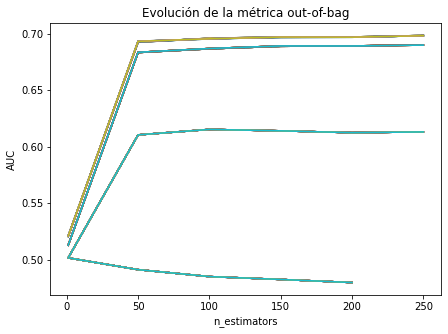

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
history.set_index('n_estimators').plot(legend=False, ax=ax)
ax.set_ylabel('AUC');
ax.set_title('Evolución de la métrica out-of-bag');

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.05, 'n_estimators': 250}

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,\
                             ccp_alpha=0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=0.05,
                       n_estimators=250)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_rfc)

Test data count:  88567
accuracy_count :  81415
accuracy_score_Validation :  0.9192475752819899
precision_score :  0.0
recall_score :  1.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"accuracy_score_Training: {rfc.score(X_train, y_train)}")

accuracy_score_Training: 0.9192466635051826


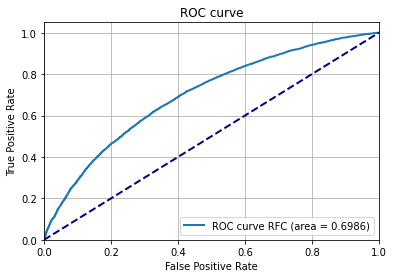

In [ ]:
y_pred2 = rfc.predict_proba(X_test)
mod='RFC'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)


0.6986012581780232


#7.Cross Validation

Se analiza la varianza de los resultados para las 3 mejores técnicas

In [ ]:
# Grabar los resultados de cada modelo
from sklearn import model_selection

models = []

#Logistic Regression
models.append(('Logistic', LogisticRegression(solver='liblinear', penalty='l1', C=0.04)))

# Naive Bayes
models.append(('Naive Bayes', GaussianNB()))

# Random Forest
models.append(('Random Forest', RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,ccp_alpha=0)))

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    # Kfol cross validation for model selection
    kfold = model_selection.KFold(n_splits=10)
    #X train , y train
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

(Logistic, 0.7128334440280267, 0.005029895947116502
(Naive Bayes, 0.6829415226133861, 0.0073940786838445575
(Random Forest, 0.698429845984078, 0.004837347107036535


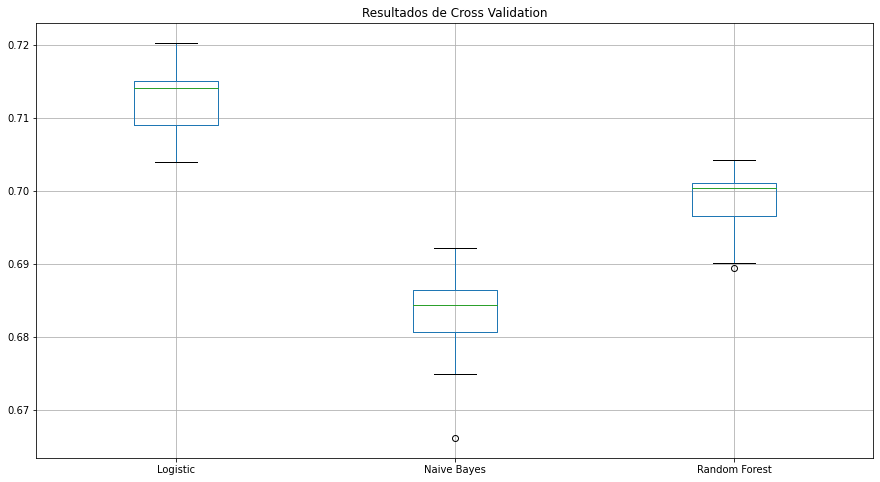

In [ ]:
plt.figure(figsize = (15,8)) 
result_df = pd.DataFrame(results, index=names).T
result_df.boxplot()
plt.title("Resultados de Cross Validation");

# 8.Evaluación Final sobre el Conjunto de Test

Para el modelo ganador: Regresión Logística

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', \
    penalty='l1', C=0.4). \
    fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81415
           1       0.47      0.00      0.01      7152

    accuracy                           0.92     88567
   macro avg       0.70      0.50      0.48     88567
weighted avg       0.88      0.92      0.88     88567



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


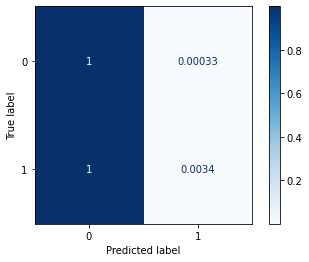

In [ ]:
plot_confusion_matrix(logistic_model, X_test, y_test,cmap=plt.cm.Blues,normalize='true');

In [ ]:
#Cálculo del Recall

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.003355704697986577